In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [5]:
df = pd.read_csv('./data/ETF종목.csv',encoding='cp949')
# df.columns

In [6]:
def resumetable(df):
    print(f'데이터 모양 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'항목'})
    summary['범주'] = df.nunique().values
    
    return summary



resumetable(df)

데이터 모양 : (631, 17)


,항목,데이터 타입,범주
0,표준코드,object,631
1,단축코드,int64,631
2,한글종목명,object,631
3,한글종목약명,object,631
4,영문종목명,object,631
5,상장일,object,310
6,기초지수명,object,433
7,지수산출기관,object,34
8,추적배수,object,4
9,복제방법,object,4


In [7]:
df.drop(columns=['표준코드','단축코드','한글종목약명'],inplace=True)

In [8]:
df_re = resumetable(df)
df_re['설명'] = '-'
df_re
# 항목별로 설명 달아 주기 


데이터 모양 : (631, 14)


,항목,데이터 타입,범주,설명
0,한글종목명,object,631,-
1,영문종목명,object,631,-
2,상장일,object,310,-
3,기초지수명,object,433,-
4,지수산출기관,object,34,-
5,추적배수,object,4,-
6,복제방법,object,4,-
7,기초시장분류,object,3,-
8,기초자산분류,object,7,-
9,상장좌수,int64,325,-


In [9]:
df_re.loc[3,'설명'] = 'ETF가 추종하는 지수'
df_re.loc[4,'설명'] = '추종지수를 산출하는 기관'
df_re.loc[5,'설명'] = '일반, 레버리지, 인버스'
df_re.loc[6,'설명'] = 'ETF운용 방법 : 액티브 or 패시브'
df_re.loc[7,'설명'] = '기초 지수 해당 국가 : 국내 or 해외 or 국내&해외'
df_re.loc[8,'설명'] = '주식, 채권, 혼합자산, 원자재, 통화, 부동산, 기타 '
df_re.loc[11,'설명'] = 'Creation Unit(설정단위) ETF 발행 단위(1주씩 아님) '


In [10]:
df_re

,항목,데이터 타입,범주,설명
0,한글종목명,object,631,-
1,영문종목명,object,631,-
2,상장일,object,310,-
3,기초지수명,object,433,ETF가 추종하는 지수
4,지수산출기관,object,34,추종지수를 산출하는 기관
5,추적배수,object,4,"일반, 레버리지, 인버스"
6,복제방법,object,4,ETF운용 방법 : 액티브 or 패시브
7,기초시장분류,object,3,기초 지수 해당 국가 : 국내 or 해외 or 국내&해외
8,기초자산분류,object,7,"주식, 채권, 혼합자산, 원자재, 통화, 부동산, 기타"
9,상장좌수,int64,325,-


In [11]:
df

,한글종목명,영문종목명,상장일,기초지수명,지수산출기관,추적배수,복제방법,기초시장분류,기초자산분류,상장좌수,운용사,CU수량,총보수,과세유형
0,BNK BNK 주주가치액티브증권상장지수투자신탁(주식),BNK BNK Shareholder Yield Active ETF,2022/10/27,FnGuide 주주가치 지수,FnGuide,일반 (1),실물(액티브),국내,주식,1100000,비엔케이자산운용,50000,0.495,배당소득세(보유기간과세)
1,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],DB Mighty KOSPI200 Covered Call ATM Leverage ETF,2018/03/20,코스피 200 커버드콜 ATM 지수,KRX,2X 레버리지 (2),실물(패시브),국내,주식,600000,디비자산운용,100000,0.510,배당소득세(보유기간과세)
2,DB 마이티 다이나믹퀀트액티브증권상장지수투자신탁[주식],DB Mighty Dynamic Quant Active ETF,2022/10/25,코스피 200,KRX,일반 (1),실물(액티브),국내,주식,1000000,디비자산운용,40000,0.300,배당소득세(보유기간과세)
3,DB마이티K100증권상장지수투자신탁(주식),DB Mighty K100 ETF,2012/07/05,코스피 100,KRX,일반 (1),실물(패시브),국내,주식,280000,디비자산운용,40000,0.390,비과세
4,KB KBSTAR 200 Total Return증권상장지수투자신탁(주식),KB KBSTAR 200 Total Return ETF,2020/08/21,코스피 200 TR,KRX,일반 (1),실물(패시브),국내,주식,9750000,케이비자산운용,50000,0.012,배당소득세(보유기간과세)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,한화ARIRANG MSCI Emerging Markets 증권상장지수투자신탁(주식-...,Hanwha ARIRANG SYNTH-MSCI Emerging Markets ETF(H),2014/05/13,MSCI EM Index,MSCI,일반 (1),합성(패시브),해외,주식,7560000,한화자산운용,20000,0.500,배당소득세(보유기간과세)
627,현대 UNICORN R&D 액티브증권상장지수투자신탁(주식),HYUNDAI UNICORN R&D ACTIVE ETF,2022/07/06,코스피 200,KRX,일반 (1),실물(액티브),국내,주식,700000,현대자산운용,50000,0.355,배당소득세(보유기간과세)
628,흥국 HK S&P로우볼증권상장지수투자신탁(주식),Heungkuk HK S&P Korea Low Volatility ETF,2015/03/25,S&P Korea 저변동성 지수,S&P,일반 (1),실물(패시브),국내,주식,450000,흥국자산운용,30000,0.400,비과세
629,흥국 HK 베스트일레븐액티브증권상장지수투자신탁(주식),Heungkuk HK Best11 Active ETF,2021/07/06,코스피 200,KRX,일반 (1),실물(액티브),국내,주식,700000,흥국자산운용,50000,0.300,배당소득세(보유기간과세)


# 운용사별 ETF 상장수

In [12]:
cnt = pd.DataFrame(df.value_counts('운용사'),columns={'상장수'})
cnt.index = cnt.index.str.replace('자산운용','')
cnt.index = cnt.index.str.replace('운용','')

[eda](https://dacon.io/competitions/open/235536/codeshare/7254?page=1&dtype=recent)

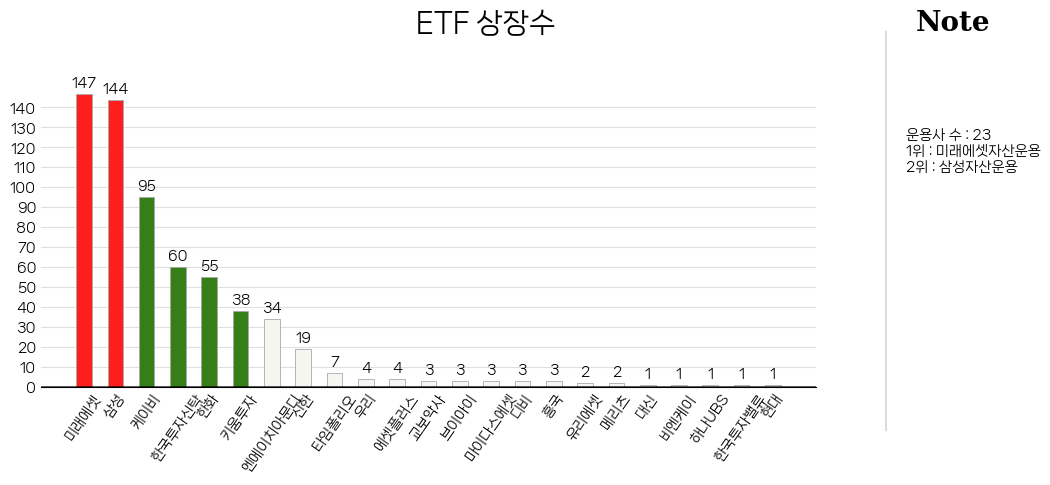

In [13]:

color_map = ['#f5f5f1' for _ in range(23)]
color_map[0] = color_map[1] =  '#FF1E1E' 
color_map[2] = color_map[3] = color_map[4] = color_map[5] = '#367E18'

fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(cnt.index, cnt['상장수'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color = color_map)

for i in cnt.index :
    ax.annotate(f"{cnt.loc[i,'상장수']}", 
                   xy = (i, cnt.loc[i,'상장수']+5), 
                   va = 'center', ha = 'center', fontweight = 'normal')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(cnt.index, rotation = 55)

fig.text(0.5, 1, 'ETF 상장수', fontsize=20, fontweight='bold')
fig.text(1.0, 1, 'Note', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.99, 0.65,
         f'운용사 수 : {len(cnt)}\n1위 : 미래에셋자산운용\n2위 : 삼성자산운용'
         , fontsize=10, fontweight='normal')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, cnt['상장수'].max(), 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=10)

import matplotlib.lines as lines
l1 = lines.Line2D([0.97, 0.97], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# 패시브 액티브 

In [14]:
passive=df[df['복제방법'].str.contains('패시브')].shape[0]
active = df['복제방법'].str.contains('액티브').sum()

print(passive,active)

538 93


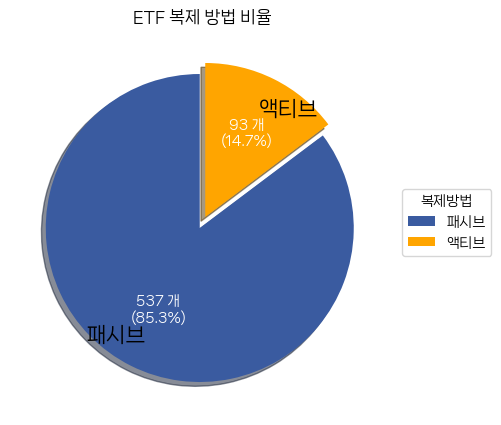

In [15]:
# Creating dataset
labels=['패시브','액티브']

ratio = [passive,active]

# Creating explode data
explode = (0.04,0.04)
 
# Creating color parameters
colors = ('#3A5BA0','#FFA500' )
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:d} 개\n({:.1f}%)".format(absolute,pct)
 
# Creating plot
fig, ax = plt.subplots(figsize =(5, 5))
wedges, texts, autotexts = ax.pie(ratio,
                                  autopct = lambda pct: func(pct, ratio),
                                  labeldistance =0.78,
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                #   wedgeprops = wp,
                                #   textprops = dict(color ="magenta"))
)

for t in texts:
    # t.set_color("white")
    t.set_fontsize(15),
    weight='bold'
# Adding legend
ax.legend(wedges, labels,
          title ="복제방법",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
# plt.setp(autotexts,color='white', size = 12, weight ="bold")
plt.setp(autotexts,color='white', size = 10, weight ="bold")
ax.set_title("ETF 복제 방법 비율")
 
# show plot
plt.show()

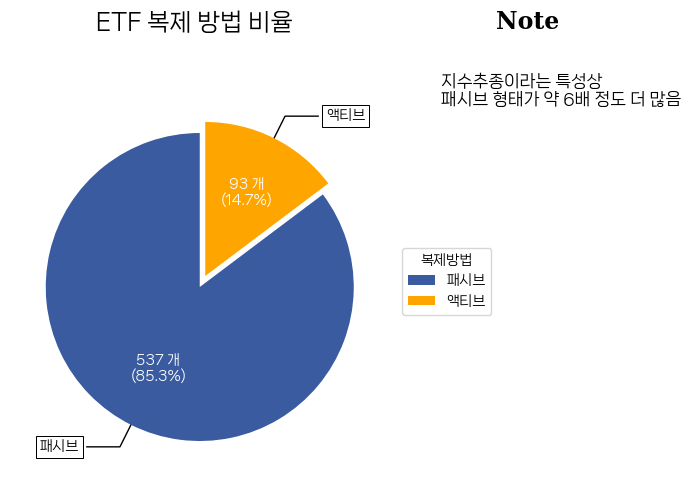

In [16]:
# Creating dataset
labels=['패시브','액티브']

ratio = [passive,active]

# Creating explode data
explode = (0.04,0.04)
 
# Creating color parameters
colors = ('#3A5BA0','#FFA500' )
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:d} 개\n({:.1f}%)".format(absolute,pct)
 
# Creating plot
fig, ax = plt.subplots(figsize =(5, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(ratio,
                                  autopct = lambda pct: func(pct, ratio),
                                  labeldistance =0.78,
                                  explode = explode,
                                #   labels = labels,
                                  # shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                #   wedgeprops = wp,
                                #   textprops = dict(color ="magenta"))
)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(0.8*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

# Adding legend
ax.legend(wedges, labels,
          title ="복제방법",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
# plt.setp(autotexts,color='white', size = 12, weight ="bold")
plt.setp(autotexts,color='white', size = 10, weight ="bold")
# ax.set_title("ETF 복제 방법 비율")

fig.text(0.3, 1, 'ETF 복제 방법 비율', fontsize=17, fontweight='bold')

fig.text(1.1, 1, 'Note', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.99, 0.85,
         f'지수추종이라는 특성상\n패시브 형태가 약 6배 정도 더 많음'
         , fontsize=12, fontweight='normal')
# show plot
plt.show()

# 가장오래된 ETF
[타임라인](https://dadoverflow.com/2021/08/17/making-timelines-with-python/)

In [17]:
df['상장일'] = pd.to_datetime(df['상장일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   한글종목명   631 non-null    object        
 1   영문종목명   631 non-null    object        
 2   상장일     631 non-null    datetime64[ns]
 3   기초지수명   631 non-null    object        
 4   지수산출기관  631 non-null    object        
 5   추적배수    631 non-null    object        
 6   복제방법    631 non-null    object        
 7   기초시장분류  631 non-null    object        
 8   기초자산분류  631 non-null    object        
 9   상장좌수    631 non-null    int64         
 10  운용사     631 non-null    object        
 11  CU수량    631 non-null    int64         
 12  총보수     631 non-null    float64       
 13  과세유형    631 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 69.1+ KB


In [18]:
df.sort_values('상장일').head(10)
#초기에는 당연히 패시브 운영만 있음

,한글종목명,영문종목명,상장일,기초지수명,지수산출기관,추적배수,복제방법,기초시장분류,기초자산분류,상장좌수,운용사,CU수량,총보수,과세유형
469,키움 KOSEF 200 상장지수증권투자신탁[주식],Kiwoom KOSEF 200 ETF,2002-10-14,코스피 200,KRX,일반 (1),실물(패시브),국내,주식,11050000,키움투자자산운용,50000,0.13,비과세
418,삼성 KODEX200 증권상장지수투자신탁[주식],SAMSUNG KODEX200 ETF,2002-10-14,코스피 200,KRX,일반 (1),실물(패시브),국내,주식,179150000,삼성자산운용,50000,0.15,비과세
389,삼성 KODEX 은행 증권상장지수투자신탁[주식],SAMSUNG KODEX BANKs ETF,2006-06-27,KRX 은행,KRX,일반 (1),실물(패시브),국내,주식,27150000,삼성자산운용,50000,0.30,비과세
380,삼성 KODEX 반도체 증권상장지수투자신탁[주식],SAMSUNG KODEX SEMICON ETF,2006-06-27,KRX 반도체,KRX,일반 (1),실물(패시브),국내,주식,7850000,삼성자산운용,50000,0.45,비과세
215,미래에셋 TIGER 반도체 증권상장지수투자신탁(주식),MIRAE ASSET TIGER SEMICON ETF,2006-06-27,KRX 반도체,KRX,일반 (1),실물(패시브),국내,주식,4420000,미래에셋자산운용,20000,0.46,비과세
390,삼성 KODEX 자동차 증권상장지수투자신탁[주식],SAMSUNG KODEX AUTOs ETF,2006-06-27,KRX 자동차,KRX,일반 (1),실물(패시브),국내,주식,34050000,삼성자산운용,50000,0.45,비과세
224,미래에셋 TIGER 은행 증권상장지수투자신탁(주식),MIRAE ASSET TIGER BANKS ETF,2006-06-27,KRX 은행,KRX,일반 (1),실물(패시브),국내,주식,1620000,미래에셋자산운용,20000,0.46,비과세
216,미래에셋 TIGER 방송통신증권상장지수투자신탁(주식),MIRAE ASSET TIGER MEDIA&TELECOM ETF,2007-09-07,KRX 방송통신,KRX,일반 (1),실물(패시브),국내,주식,540000,미래에셋자산운용,20000,0.46,비과세
398,삼성 KODEX 차이나H증권상장지수투자신탁[주식],SAMSUNG KODEX China H ETF,2007-10-10,Hang Seng China H,HangSeng,일반 (1),실물(패시브),해외,주식,2800000,삼성자산운용,50000,0.12,배당소득세(해외주식투자전용ETF)
474,키움 KOSEF KRX100 상장지수증권투자신탁[주식],Kiwoom KOSEF KRX100 ETF,2008-01-23,KRX 100,KRX,일반 (1),실물(패시브),국내,주식,1800000,키움투자자산운용,300000,0.23,비과세


In [19]:
df[df['복제방법'].str.contains('액티브')].value_counts("추적배수")

추적배수
일반 (1)    93
dtype: int64

In [20]:
df[df['복제방법'].str.contains('패시브')].value_counts("추적배수")


추적배수
일반 (1)         456
2X 레버리지 (2)     40
1X 인버스 (-1)     33
2X 인버스 (-2)      9
dtype: int64

In [21]:
df['복제방법_1'] = df['복제방법'].str.split('(').str[1].str.replace(')','')

In [22]:
df_1 = df.groupby(['복제방법_1','추적배수']).count().reset_index()
df_1 =df_1.sort_index(ascending=False)

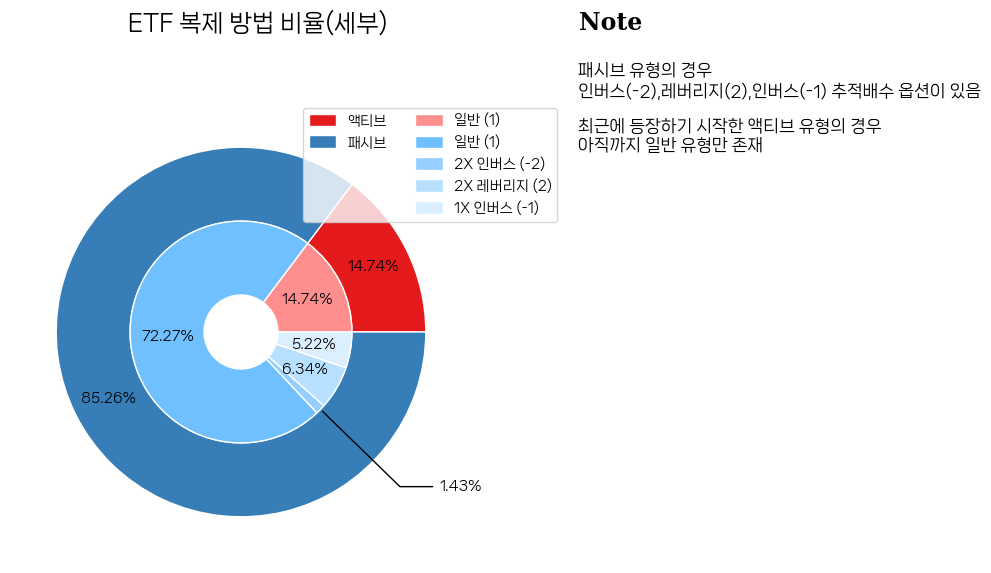

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import seaborn as sns
 
freq_col = '한글종목명' ## 빈도수 칼럼
outer_col = '복제방법_1' ## 상위 그룹 칼럼
inner_col = '추적배수' ## 하위 그룹 칼럼
 
size = 0.4 ## 바깥쪽, 안쪽 도넛 조각 조각의 반지름 비율을 0.3으로 한다.
threshold = 4 ## 상한선 백분율
 
color = sns.color_palette('Set1',len(df_1[outer_col].unique())) ## 바깥쪽 도넛의 색상설정 'hls'
# colors = ('#3A5BA0','#FFA500' )

summary = df_1.groupby(outer_col)[freq_col].sum().reset_index() ## 복제방법별 빈도수 확인
outer_data = summary[freq_col] ## 바깥쪽 도넛에 해당하는 데이터
inner_data = [] ## 안쪽 도넛에 대응하는 데이터
for s in summary[outer_col]:
    inner_data += list(df_1.query('{0}==@s'.format(outer_col))[freq_col])
 
# fig= plt.figure(figsize=(10,6)) ## 캔버스 생성
fig= plt.figure(figsize=(10,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(outer_data,
             radius=1,
             colors=color,
             wedgeprops=dict(width=size,edgecolor='w'))
 
## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data) ## 바깥쪽 빈도수의 총합
 
sum_pct = 0 ## 백분율 초기값
 
for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2 ## 각1, 각2
    out_r = out_pie[0][i].r ## 원의 반지름
    
    x = ((2*out_r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*out_r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{outer_data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center')
 
outer_color = [] ## 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor()) ## 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color] ## rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0],x[1],1) for x in outer_color_hsv] ## 색상 채도만 가져오고 명도는 1로 고정한다.
 
inner_color = [] ## 안쪽 도넛 조각의 색상을 담는 리스트
for i, g in enumerate(summary[outer_col]):
    num_sub_group = len(df_1.query('{0}==@g'.format(outer_col))) ## 하위 그룹 개수
    jump = outer_color_hsv[i][1]/(num_sub_group+1) ## 채도 등분점 간격
    temp_list = []
    temp_s = np.arange(0,outer_color_hsv[i][1],jump) 
    temp_s = temp_s[1:] ## 채도 등분점
    for t in temp_s:
        h = outer_color_hsv[i][0] ## 색상
        s = t ## 채도
        v = outer_color_hsv[i][2] ## 명도
        temp_list.append((h,s,v))
    inner_color += temp_list[::-1] ## 순서를 바꿈
    
inner_color = [mcl.hsv_to_rgb(x) for x in inner_color] #3 hsv를 다시 rgb로 바꾼다.
 
## 안쪽 도넛 차트 출력
inner_pie = ax.pie(inner_data,
       radius=1-size,
       colors=inner_color,
       wedgeprops=dict(width=size,edgecolor='w'))
 
## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
inner_sum_pct = 0 ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2 ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r ## 안쪽 도넛의 반지름
    
    x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        text = f'{inner_data[i]/total*100:.2f}%' ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100-inner_sum_pct:.2f}%'
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = out_r*np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = out_r*np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=((out_r-size)*x, (out_r-size)*y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center')
 
## 범례
## 범례는 2줄로 만든다. 왼쪽 줄에는 상위 그룹을 표시하고 오른쪽 줄에는 하위 그룹을 표시한다.
inner_pie_index = -1 ## 안쪽 도넛 차트의 데이터에 접근할 인덱스 초기값
right_legend_patches = [] ## 오른쪽 범례 칼럼에 들어가는 요소
left_legend_patches = [] ## 왼쪽 범례 칼럼에 들어가는 요소
right_labels = [] ## 오른쪽 범례 칼럼에 들어가는 라벨
left_labels = [] ## 왼쪽 범례 칼러에 들어가는 라벨
for i in range(len(outer_data)):
    left_legend_patches.append(out_pie[0][i])
    
    outer_label = summary[outer_col][i] ## 바깥쪽 도넛 차트 라벨
 
    left_labels.append(outer_label)
    temp_data = df_1.query('{0}==@outer_label'.format(outer_col)) ## 바깥쪽 라벨에 대응하는 안쪽 도넛 데이터
    temp_data = temp_data.reset_index(drop=True)
    
    temp_number = len(temp_data)-1
    
    ## 오른쪽 범례 개수와 맞추기 위해 빈 범례를 만듬
    for k in range(temp_number):
        rect = mpt.Rectangle((0,0),1,1.1,facecolor='None')
        left_legend_patches.append(rect)
        left_labels.append('')
    
    ## 오른쪽 범례 칼럼을 만든다.
    for j in range(len(temp_data)):
        inner_pie_index += 1
        
        right_legend_patches.append(inner_pie[0][inner_pie_index])
        right_labels.append(temp_data[inner_col][j])
        
    ## 범례 요소와 라벨을 합친다.
    legend_patches = left_legend_patches+right_legend_patches
    labels = left_labels + right_labels
        
## 범례 출력
plt.legend(legend_patches,
           labels,
           ncol=2,
           loc='upper right',
           handleheight=1, ## 범례 줄 맞춤
           labelspacing=0.5, ## 범례 줄 간격
           bbox_to_anchor=(1.2,1))

fig.text(0.4, 1, 'ETF 복제 방법 비율(세부)', fontsize=17, fontweight='bold')

fig.text(0.85, 1, 'Note', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.85, 0.8,
         f'패시브 유형의 경우\n인버스(-2),레버리지(2),인버스(-1) 추적배수 옵션이 있음\n\n최근에 등장하기 시작한 액티브 유형의 경우\n아직까지 일반 유형만 존재'
         , fontsize=12, fontweight='normal')
 
plt.show()


In [24]:
df_time = df[['한글종목명','상장일']].sort_values(by='상장일').reset_index(drop=True)
df_time['year'] = df_time['상장일'].dt.year
df_time

,한글종목명,상장일,year
0,키움 KOSEF 200 상장지수증권투자신탁[주식],2002-10-14,2002
1,삼성 KODEX200 증권상장지수투자신탁[주식],2002-10-14,2002
2,삼성 KODEX 은행 증권상장지수투자신탁[주식],2006-06-27,2006
3,삼성 KODEX 반도체 증권상장지수투자신탁[주식],2006-06-27,2006
4,미래에셋 TIGER 반도체 증권상장지수투자신탁(주식),2006-06-27,2006
...,...,...,...
626,키움 KOSEF 차이나A50커넥트인버스MSCI증권ETF[주식혼합-파생형](합성 H),2022-10-25,2022
627,키움 KOSEF 차이나A50커넥트레버리지MSCI증권ETF[주식혼합-파생형](합성 H),2022-10-25,2022
628,DB 마이티 다이나믹퀀트액티브증권상장지수투자신탁[주식],2022-10-25,2022
629,BNK BNK 주주가치액티브증권상장지수투자신탁(주식),2022-10-27,2022


In [25]:
df_time_1 = pd.DataFrame(df_time['상장일'].dt.year.value_counts().sort_index())
# df_time_1

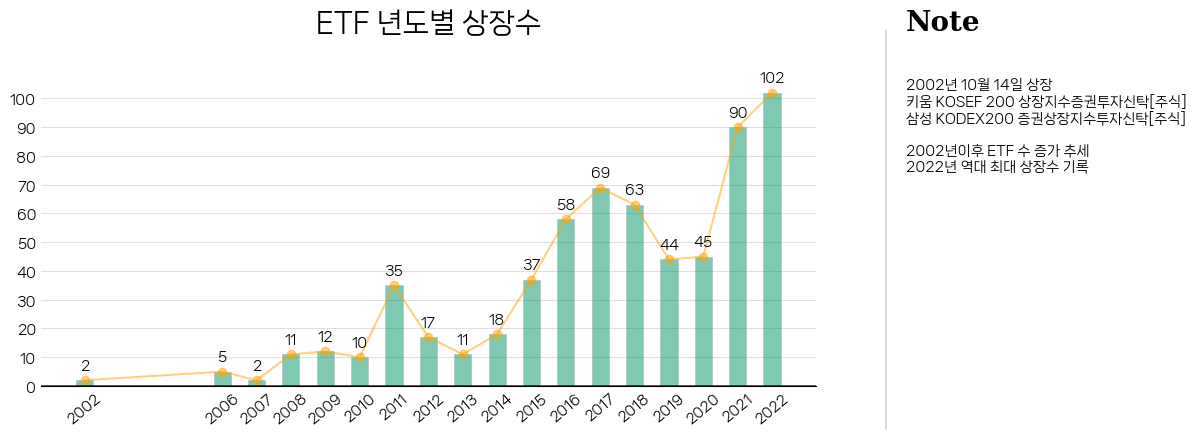

In [26]:
color_map = ['#019267' for _ in range(6)] #len : 18

fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(df_time_1.index, df_time_1['상장일'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color = color_map,alpha=0.5)
ax.plot(df_time_1.index, df_time_1['상장일'],color='#FFA500',marker='o',alpha=0.5)

for i in df_time_1.index :
    ax.annotate(f"{df_time_1.loc[i,'상장일']}", 
                   xy = (i, df_time_1.loc[i,'상장일']+5), 
                   va = 'center', ha = 'center', fontweight = 'normal')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticks(df_time_1.index.tolist(), rotation = 40)
ax.set_xticklabels(df_time_1.index.tolist(), rotation = 40)


fig.text(0.4, 1, 'ETF 년도별 상장수', fontsize=20, fontweight='bold')
fig.text(0.99, 1, 'Note', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.99, 0.65,
         f"2002년 10월 14일 상장\n{df_time['한글종목명'][0]}\n{df_time['한글종목명'][1]}\n\n2002년이후 ETF 수 증가 추세\n2022년 역대 최대 상장수 기록"
         , fontsize=10, fontweight='normal')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, df_time_1['상장일'].max(), 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=10)

import matplotlib.lines as lines
l1 = lines.Line2D([0.97, 0.97], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [27]:
base_asset = pd.DataFrame(df['기초자산분류'].value_counts())
base_asset['rate']=base_asset.loc[:,'기초자산분류']/631*100
base_asset['rate'] = round(base_asset['rate'],2)
base_asset

,기초자산분류,rate
주식,479,75.91
채권,73,11.57
혼합자산,30,4.75
원자재,19,3.01
통화,11,1.74
부동산,10,1.58
기타,9,1.43


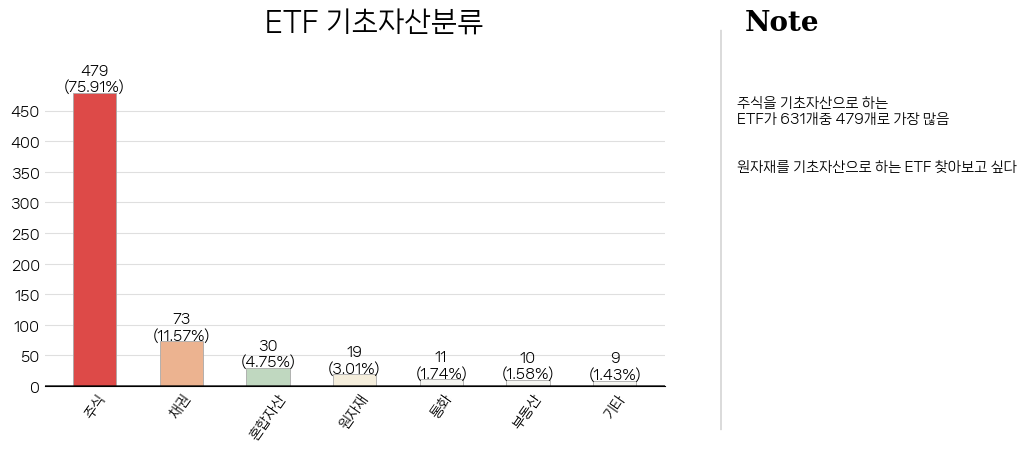

In [28]:

color_map = ['#f5f5f1' for _ in range(7)]
color_map[0] = '#DD4A48'
color_map[1] =  '#ECB390' 
color_map[2] = '#C0D8C0' 
color_map[3] = '#F5EEDC' 
# color_map[4] = '#F96666' 
# color_map[5] = '#367E18'

fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.bar(base_asset.index, base_asset['기초자산분류'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color = color_map)

for i in base_asset.index :
    ax.annotate(f"{base_asset.loc[i,'기초자산분류']}\n({base_asset.loc[i,'rate']}%)", 
                   xy = (i, base_asset.loc[i,'기초자산분류']+22), 
                   va = 'center', ha = 'center', fontweight = 'normal')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(base_asset.index, rotation = 55)

fig.text(0.4, 1, 'ETF 기초자산분류', fontsize=20, fontweight='bold')
fig.text(1.0, 1, 'Note', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.99, 0.65,
         f'주식을 기초자산으로 하는\nETF가 631개중 479개로 가장 많음\n\n\n원자재를 기초자산으로 하는 ETF 찾아보고 싶다'
         , fontsize=10, fontweight='normal')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, base_asset['기초자산분류'].max(), 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=10)

import matplotlib.lines as lines
l1 = lines.Line2D([0.97, 0.97], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 추종지수

In [170]:
base_idx = pd.DataFrame(df.기초지수명.value_counts())
base_idx['rate'] = base_idx.loc[:,'기초지수명']/631 *100
base_idx['rate'] = round(base_idx['rate'],2)
base_idx = base_idx.iloc[:20,:]
base_idx.index = base_idx.index.str.replace('지수','').str.replace('Index','')
base_idx.index = base_idx.index.str.replace('Treasury Bond Futures Excess Return','TBFER')
base_idx

,기초지수명,rate
코스피 200,18,2.85
코스피 200 선물,16,2.54
S&P 500,13,2.06
코스피,10,1.58
미국달러선물,10,1.58
코스닥 150,9,1.43
KRX 300,9,1.43
NASDAQ 100,9,1.43
F-코스닥150,8,1.27
코스피 200 TR,7,1.11


In [171]:
uni = sorted(list(set(base_idx.rate.value_counts().index)))
uni = uni[:-3]
uni

[0.63, 0.79, 0.95, 1.11, 1.27, 1.43, 1.58]

In [172]:
for i in uni:
    idx = base_idx.loc[base_idx['rate']==i].index
    for n in range(1,len(idx)):        
        base_idx['rate'][base_idx.index==idx[n]] = " "
base_idx
    
    
    

,기초지수명,rate
코스피 200,18,2.85
코스피 200 선물,16,2.54
S&P 500,13,2.06
코스피,10,1.58
미국달러선물,10,
코스닥 150,9,1.43
KRX 300,9,
NASDAQ 100,9,
F-코스닥150,8,1.27
코스피 200 TR,7,1.11


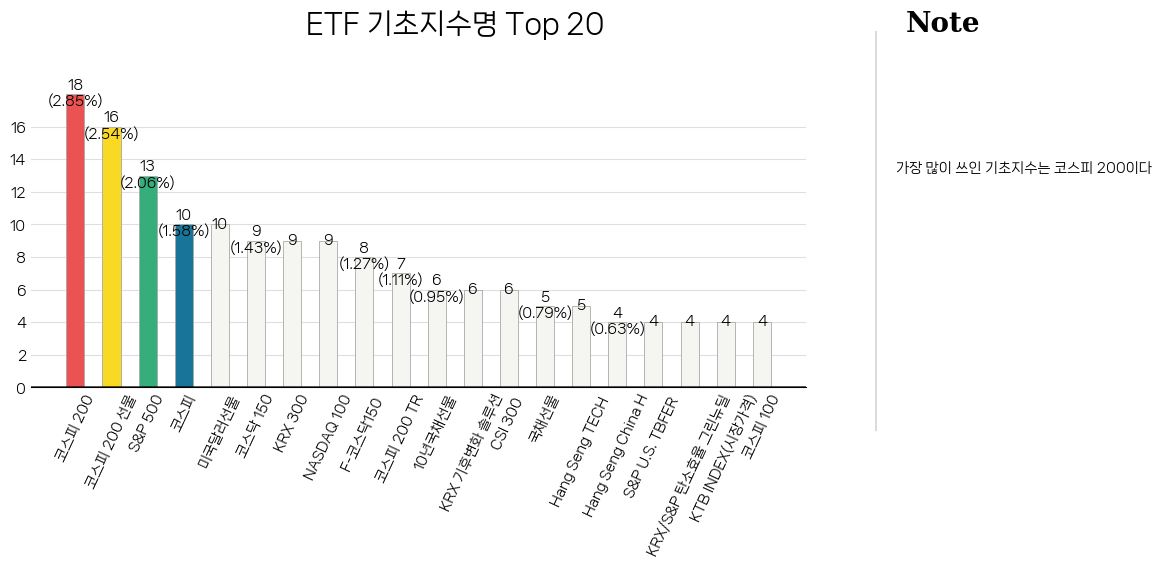

In [183]:
color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] = '#EB5353'
color_map[1] =  '#F9D923' 
color_map[2] = '#36AE7C' 
color_map[3] = '#187498' 

fig, ax = plt.subplots(1,1, figsize=(10, 4))

ax.bar(base_idx.index, base_idx['기초지수명'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color = color_map)

for i in base_idx.index :
    if base_idx.loc[i,'rate'] == " "  :
        ax.annotate(f"{base_idx.loc[i,'기초지수명']}", 
                    xy = (i, base_idx.loc[i,'기초지수명']), 
                    va = 'center', ha = 'center', fontweight = 'normal',fontsize=10)
    else : 
        ax.annotate(f"{base_idx.loc[i,'기초지수명']}\n({base_idx.loc[i,'rate']}%)", 
                    xy = (i, base_idx.loc[i,'기초지수명']), 
                    va = 'center', ha = 'center', fontweight = 'normal',fontsize=10)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(base_idx.index, rotation = 65)

fig.text(0.4, 1, 'ETF 기초지수명 Top 20', fontsize=20, fontweight='bold')
fig.text(1.0, 1, 'Note', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.99, 0.65,
         f'가장 많이 쓰인 기초지수는 코스피 200이다'
         , fontsize=10, fontweight='normal')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, base_idx['기초지수명'].max(), 2) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=10)

import matplotlib.lines as lines
l1 = lines.Line2D([0.97, 0.97], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()